# Two Qubit States
$$
 \newcommand{\ul}[1]{\underline{#1}}
 \newcommand{\rvx}[0]{{\ul{x}}}
\newcommand{\rvy}[0]{{\ul{y}}}
\newcommand{\bra}[1]{\langle#1|}
\newcommand{\ket}[1]{|#1\rangle}
\newcommand{\calh}[0]{{\cal H}}
\newcommand{\tr}[0]{{\rm tr }}
\newcommand{\alp}[0]{\alpha}
$$

The purpose of this notebook is to
illustrate the use of entanglish's class TwoQubitState which contains 
methods for calculating quantities related to entanglement for
2 qubit states (Bell Basis states, states that are diagonal
in the Bell Basis such as Werner states, etc.)
In particular, the class calculates 
the entanglement of formation
of an arbitrary density matrix of 2 qubits.

First change your working directory to the entanglish directory in your computer, and add its path to the path environment variable.

In [1]:
import os
import sys
print(os.getcwd())
os.chdir('../../')
print(os.getcwd())
sys.path.insert(0,os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\entanglish\entanglish\jupyter_notebooks
C:\Users\rrtuc\Desktop\backed-up\python-projects\entanglish


In [2]:
from entanglish.EntangCase import *
from entanglish.PureStEnt import *
from entanglish.TwoQubitState import *


## Bell Basis states

Suppose $\calh_\rvx$ is the linear span of
two orthonormal states $\ket{0}_\rvx$ and 
$\ket{1}_\rvx$. Define $\calh_\rvy$ analogously to
$\calh_\rvx$ but with $\rvx$ replaced by $\rvy$.
Let $\calh_{\rvx, \rvy}= \calh_\rvx\otimes\calh_\rvy$.
The following 4 states are usually called the Bell Basis of
$\calh_{\rvx\rvy}$:

$$
\ket{\Phi^\pm}=\ket{=^\pm}=\frac{1}{\sqrt{2}}(\ket{00}_{\rvx,\rvy}\pm
\ket{11}_{\rvx,\rvy})$$

$$
\ket{\Psi^\pm}=\ket{\neq^\pm}=\frac{1}{\sqrt{2}}(\ket{01}_{\rvx,\rvy}\pm\ket{10}_{\rvx,\rvy})$$

In Entanglish, we denote

$=+$ by `'==+'`,

$=-$ by `'==-'`,

$\neq+$ by `'!=+'`,

$\neq-$ by `'!=-'`.

Next we print for each of the four Bell Basis states,
its state vector and its entanglement profile.

The entanglement profile of a density matrix
$\rho$ with number of rows `num_rows` and row shape `row_shape`  $=(n_0, n_1, \ldots ,n_{L-1})$, 
gives for each possible bipartition $\rvx, \rvy$ of set $\{0, 1, \ldots , L-1\}$,
the entanglement for that bipartition and the
maximum possible entanglement. (A bipartition of a set $A$
is a pair of non-empty disjoint sets whose union is $A$).

For a pure state 
$\rho_{\rvx, \rvy}=\ket{\psi}_{\rvx,\rvy}\bra{\psi}_{\rvx,\rvy}$,
the entanglement equals the von Neumann entropy of 
$\rho_\rvx=\tr_\rvy \rho_{\rvx, \rvy}$.

 The 4 Bell Basis states are maximally entangled
 with entanglement $\ln 2$.

In [3]:
for key in TwoQubitState.bell_key_set():
    st_vec = TwoQubitState.get_bell_basis_st_vec(key)
    dm = DenMat(4, (2, 2))
    dm.set_arr_from_st_vec(st_vec)
    ecase = PureStEnt(dm)
    pf = ecase.get_entang_profile()
    print('----------key:', key)
    print("st_vec=\n", st_vec)
    ecase.print_entang_profiles([pf], dm.row_shape)

----------key: !=+
st_vec=
 [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
bi-partition half-size=1
(0 | 1) :	 0.69315, max-entang= 0.69315
(1 | 0) :	 0.69315, max-entang= 0.69315

----------key: ==-
st_vec=
 [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
bi-partition half-size=1
(0 | 1) :	 0.69315, max-entang= 0.69315
(1 | 0) :	 0.69315, max-entang= 0.69315

----------key: !=-
st_vec=
 [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]
bi-partition half-size=1
(0 | 1) :	 0.69315, max-entang= 0.69315
(1 | 0) :	 0.69315, max-entang= 0.69315

----------key: ==+
st_vec=
 [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
bi-partition half-size=1
(0 | 1) :	 0.69315, max-entang= 0.69315
(1 | 0) :	 0.69315, max-entang= 0.69315



## Entanglement of Formation

The Entanglement of Formation of a
density matrix $\rho_{\rvx, \rvy}$ is defined as

$$E(\rho_{\rvx, \rvy}) = \sum_\alp w^\alp \; {\rm min}S(\rho_\rvx^\alp)$$

where $S(\rho_\rvx^\alp)$ is the von Neumann entropy for  density matrix 
$\rho_\rvx^\alp = \tr_\rvy \rho_{\rvx, \rvy}^\alp$. 
The minimum is over all  $\rho_{\rvx, \rvy}^\alp$ such that
$\rho_{\rvx, \rvy}^\alp$ is a pure state 
$\ket{\psi_{\rvx, \rvy}^\alp}\bra{\psi_{\rvx, \rvy}^\alp}$, and 
$\sum_\alp w^\alp
\rho_{\rvx, \rvy}^\alp =  \rho_{\rvx, \rvy}$ where
$\rho_{\rvx, \rvy}$ is a given, fixed density matrix.
      
A closed exact formula is known, thanks to Wootters et al., for the
entanglement of formation of an arbitrary mixture of 2 qubits. Class
TwoQubitState of entanglish contains an implementation of said formula.
We show how to use that next.



In [4]:
dm1 = TwoQubitState.get_bell_basis_diag_dm(fid=.7)
# print('arr=\n', dm1.arr)
np.random.seed(123)
dm2 = DenMat(4, (2, 2))
dm2.set_arr_to_rand_den_mat(np.array([.1, .2, .3, .4]))
dm3 = DenMat(4, (2, 2))
dm3.set_arr_to_rand_den_mat(np.array([.1, .1, .1, .7]))
k=0
for dm in [dm1, dm2, dm3]:
    k += 1
    print("----------dm" + str(k))
    print("formation_entang=",
          TwoQubitState.get_known_formation_entang(dm))


----------dm1
formation_entang= 0.17344269198907492
----------dm2
formation_entang= 0.0
----------dm3
formation_entang= 0.07852966445691076


Next we plot the Formation Entanglement/ln(2) versus Fidelity for the "isotropic Werner state" (of 2 qubits)

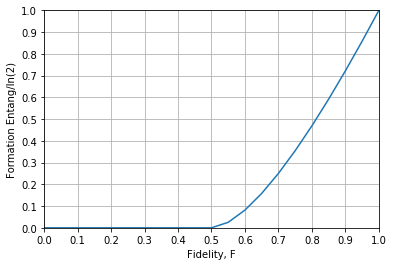

In [8]:
import matplotlib.pyplot as plt
xvals = np.arange(0, 1.05, .05)
ln2 = np.log(2)
yvals = [TwoQubitState.get_known_formation_entang(
    TwoQubitState.get_bell_basis_diag_dm(fid))/ln2 for fid in xvals]
plt.plot(xvals, yvals)
plt.xlabel('Fidelity, F')
plt.ylabel('Formation Entang/ln(2)')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.show()